# Beta Chain Model Comparisons

## Setup

In [1]:
import os
from pathlib import Path
import sys

if '__project_dir__' not in globals():
    __project_dir__ = Path.cwd().parent.resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [3]:
BENCHMARKING_PARENT_DIR = Path('benchmarks_beta')

In [4]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [5]:

def collapse_names(name):
    groups = (
        'AutoContrastive_BetaCDR3BERT_NoCLS',
        'AutoContrastive_BetaCDR3BERT',
        'EpitopeContrastive_BetaCDR3BERT',
        'AutoContrastive_CDR3BERT',
        'BetaCDR3BERT_ap',
        'BetaCDR3BERT_a'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

## k-NN Scores

In [6]:
knn_scores = {mdict['model_name']: mdict['knn_scores'] for mdict in metric_dicts}
knn_scores = pd.DataFrame.from_dict(knn_scores, orient='index')
knn_scores = knn_scores.sort_values(by='5')
knn_scores.index = knn_scores.index.map(collapse_names)
knn_scores.columns = knn_scores.columns.map(lambda x: f'k={x}')

In [7]:
knn_scores

,k=5,k=10,k=50,k=100
atchley_embedder,0.103696,0.099130,0.091304,0.089565
BetaCDR3BERT_a,0.203696,0.196522,0.165435,0.156087
BetaCDR3BERT_ap,0.255652,0.252391,0.213696,0.182826
cdr3_levenshtein,0.261087,0.267609,0.217609,0.198261
EpitopeContrastive_BetaCDR3BERT,0.281522,0.287826,0.243043,0.224565
AutoContrastive_BetaCDR3BERT,0.283913,0.290870,0.254130,0.226304
AutoContrastive_BetaCDR3BERT_NoCLS,0.290870,0.287826,0.249565,0.228696
AutoContrastive_CDR3BERT,0.296087,0.295652,0.256304,0.235870


### Does it learn better if you add positional info?

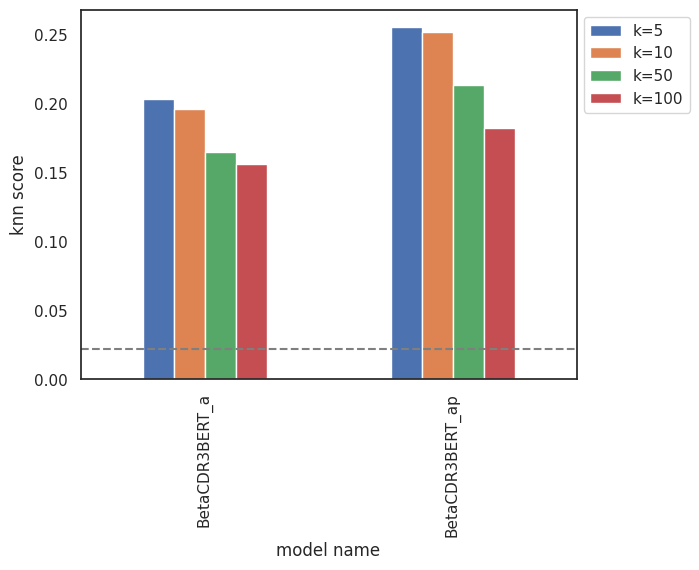

In [15]:
embedding_info = knn_scores.loc[['BetaCDR3BERT_a', 'BetaCDR3BERT_ap']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/46, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does it learn with autocontrastive learning?

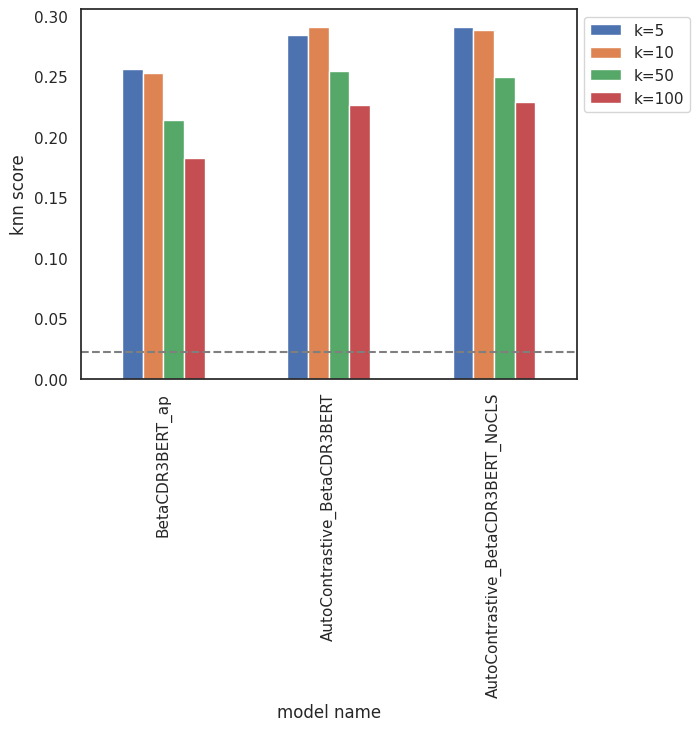

In [16]:
embedding_info = knn_scores.loc[['BetaCDR3BERT_ap', 'AutoContrastive_BetaCDR3BERT', 'AutoContrastive_BetaCDR3BERT_NoCLS']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/46, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does it learn with contrastive learning on epitope-labelled data?

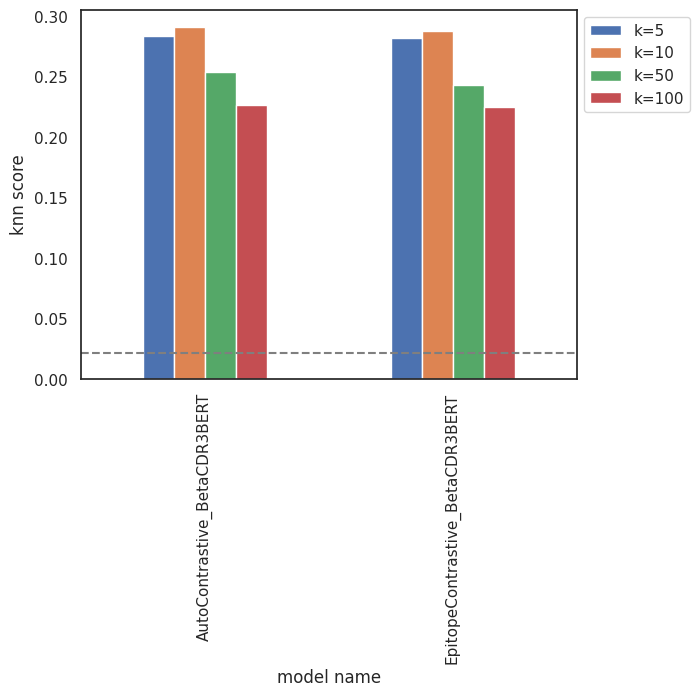

In [17]:
embedding_info = knn_scores.loc[['AutoContrastive_BetaCDR3BERT', 'EpitopeContrastive_BetaCDR3BERT']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/46, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does it learn with paired-chain context data?

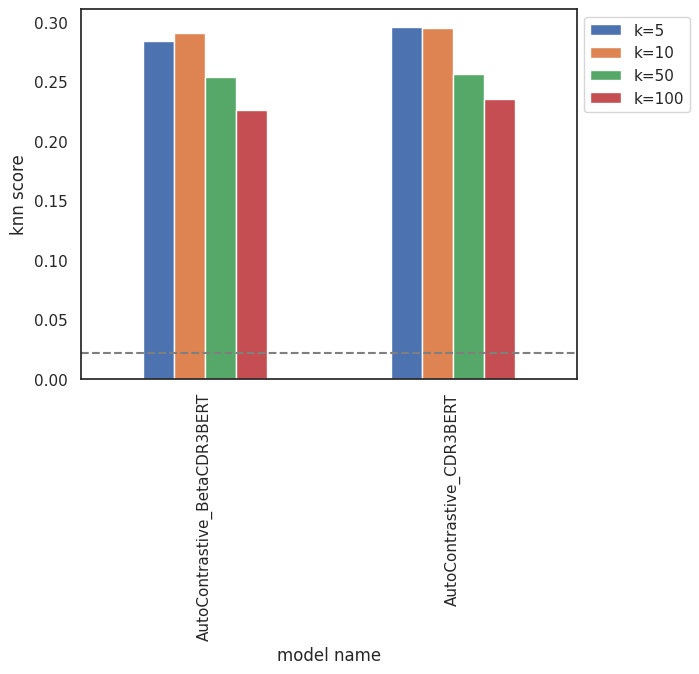

In [18]:
embedding_info = knn_scores.loc[['AutoContrastive_BetaCDR3BERT', 'AutoContrastive_CDR3BERT']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/46, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Is it better than levenshtein?

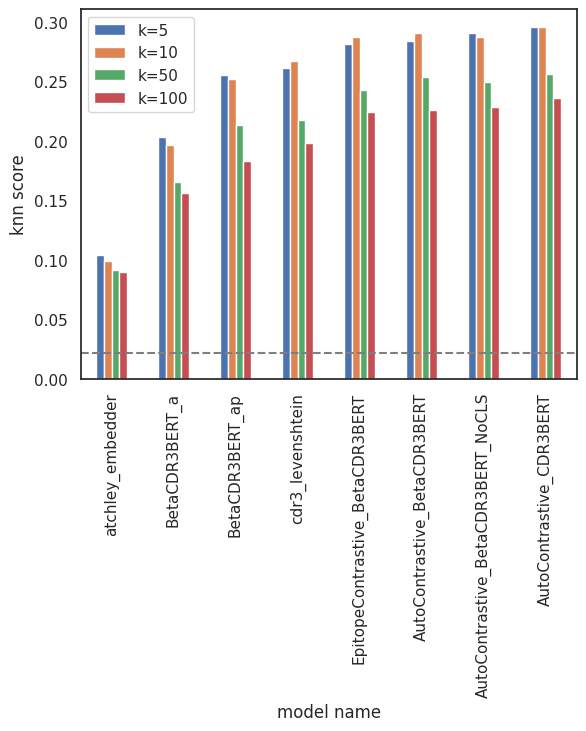

In [8]:
knn_scores.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/46, color='tab:grey', linestyle='dashed')

In [9]:
alnunf = {mdict['model_name']: {'alignment': mdict['alignment'], 'uniformity': mdict['uniformity'], '5nn accuracy': mdict['knn_scores']['5']} for mdict in metric_dicts}
alnunf = pd.DataFrame.from_dict(alnunf, orient='index')
alnunf = alnunf.sort_index()
alnunf.index = alnunf.index.map(collapse_names)
alnunf['alignment + uniformity'] = alnunf['alignment'] + alnunf['uniformity']
alnunf = alnunf[alnunf.index != 'cdr3_levenshtein']

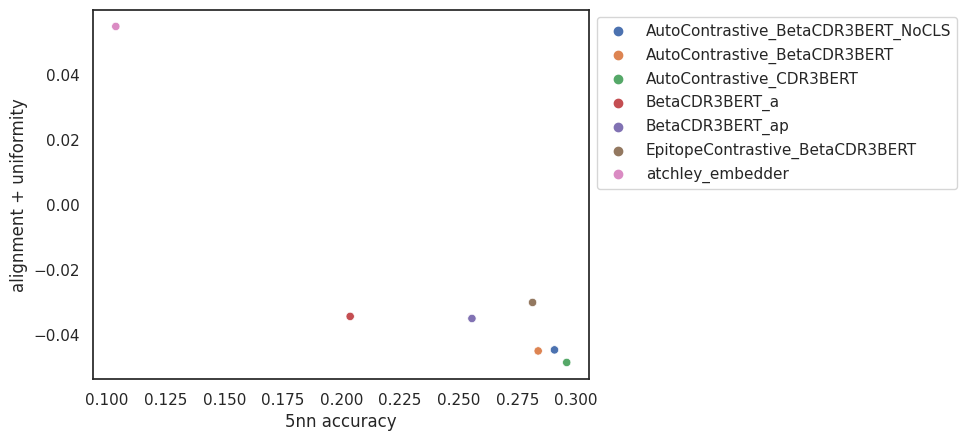

In [10]:
scatter_model_names = seaborn.scatterplot(alnunf, x='5nn accuracy', y='alignment + uniformity', hue=alnunf.index)
seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

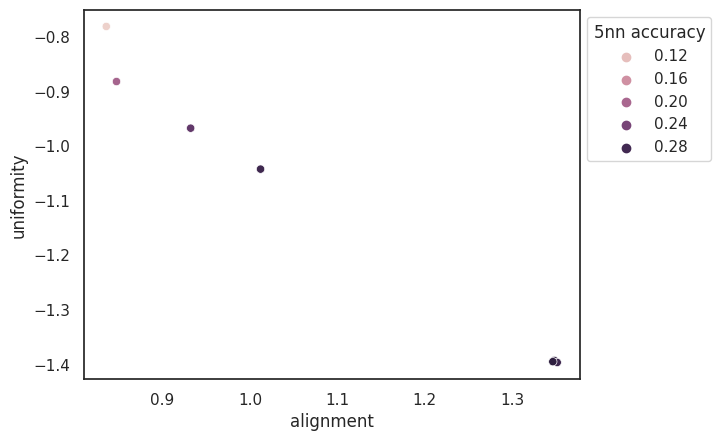

In [11]:
scatter_model_names = seaborn.scatterplot(alnunf, x='alignment', y='uniformity', hue='5nn accuracy')
seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()